# Étude de l'erreur due à la diffusion et à la convection dans le cas du SWARM

In [1]:
import sys
import os

lib_path = os.path.realpath(os.path.join(os.getcwd(), '..'))
if lib_path not in sys.path:
    sys.path = [lib_path] + sys.path
savefig_path = '/home/as259691/Documents/article_JCP_en/figures/'
save_fig =  True

In [2]:
from src.main import *
from src.plot_fields import *

%matplotlib notebook
rc('figure', figsize=(10,5))
rc('figure', dpi=100)
rc('font', size=18)
rc('legend', fontsize=16)
rc('figure', max_open_warning=80)
rc('text.latex', preamble=r'\usepackage{siunitx}')

In [3]:
n_max = 10**8

## Paramètres de la simulation

Ici on va réaliser une simulation sans diffusion pour différentes écritures de notre équation thermique.

La résolution se fait à chaque fois en WENO avec Euler explicite en temps.

In [4]:
# d = 6./100*Delta/2.
phy_prop = PhysicalProperties(Delta=0.02, v=0.2, dS=0.005**2,
                              lda1=5.5*10**-2, lda2=15.5, rho_cp1=70278., rho_cp2=702780., diff=1.,
                              alpha=0.06, a_i=357.)
phy_prop_ref = PhysicalProperties(Delta=0.02, v=0., dS=0.005**2,
                              lda1=5.5*10**-2, lda2=15.5, rho_cp1=70278., rho_cp2=702780., diff=1.,
                              alpha=0.06, a_i=357.)
markers = Bulles(phy_prop=phy_prop)
Formulation = [Problem, ProblemConserv2]

n_lim = 10**8
t_fin = 0.02

In [5]:
def compare_energy_forme(formu, phy_prop, num_prop, markers, t_fin, t_list=None):
    fig1,ax1 = plt.subplots(1)
    ax1.set_title('Énergie en fonction du temps')
    for form in formu:
        print()
        prob = form(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop)
        if t_list is not None:
            t_list.append(prob.dt)
        E0 = prob.energy
        print(prob.name)
        print('==========================')
        t, e = prob.timestep(t_fin=t_fin, n=min(n_max, n_lim), number_of_plots=5, debug=None, plotter=Plotter('decale'), ispretty=False)
        l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob.name)
        n = len(e)
        i0 = int(n/5)
        dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob.dt / E0  # on a mult
        # par Dt / rho_cp_l T_l V
        print('dE*/dt* = %g' % dedt_adim)
    le = fig1.legend()
    ax1.grid(b=True, which='major')
    ax1.minorticks_on()
    ax1.grid(b=True, which='minor', alpha=0.2)
    fig1.tight_layout()
    return e[-1] - e[0]

## Étude selon la formulation de l'équation

En fait s'il n'y a pas de convection il n'y a pas de différence entre les différentes formes, à l'exception de la moyenne utilisée pour $\frac{1}{\rho C_p}$

### RK4

<IPython.core.display.Javascript object>


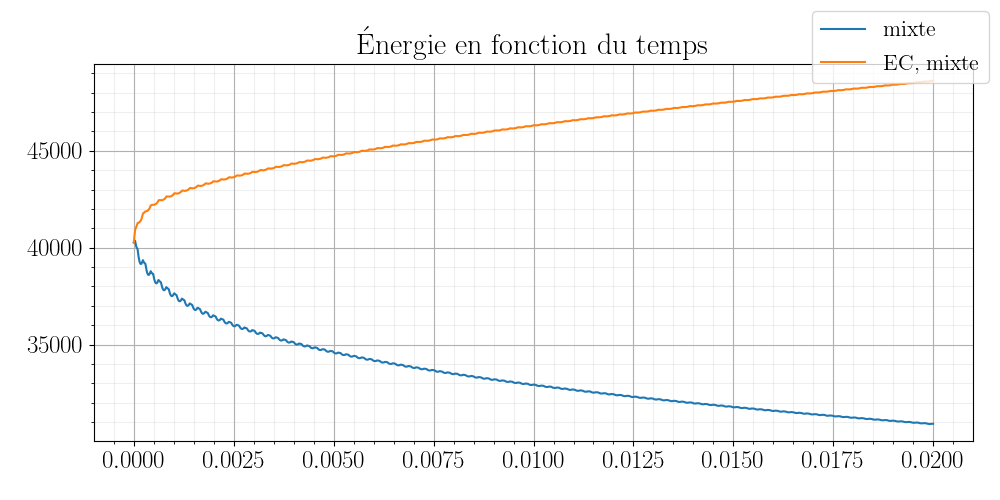


dt fourier
6.918433404737903e-06
mixte


<IPython.core.display.Javascript object>


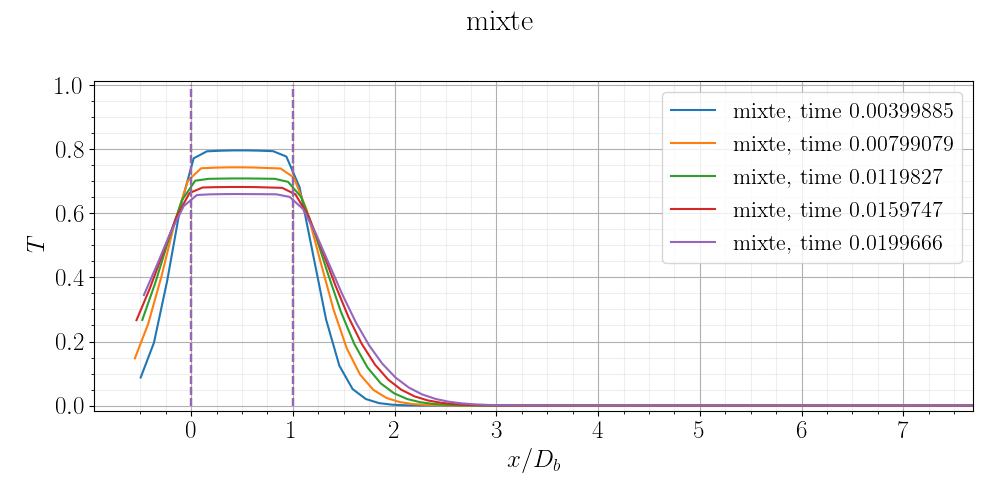

dE*/dt* = -4.52863e-05

dt fourier
6.918433404737903e-06
EC, mixte


<IPython.core.display.Javascript object>


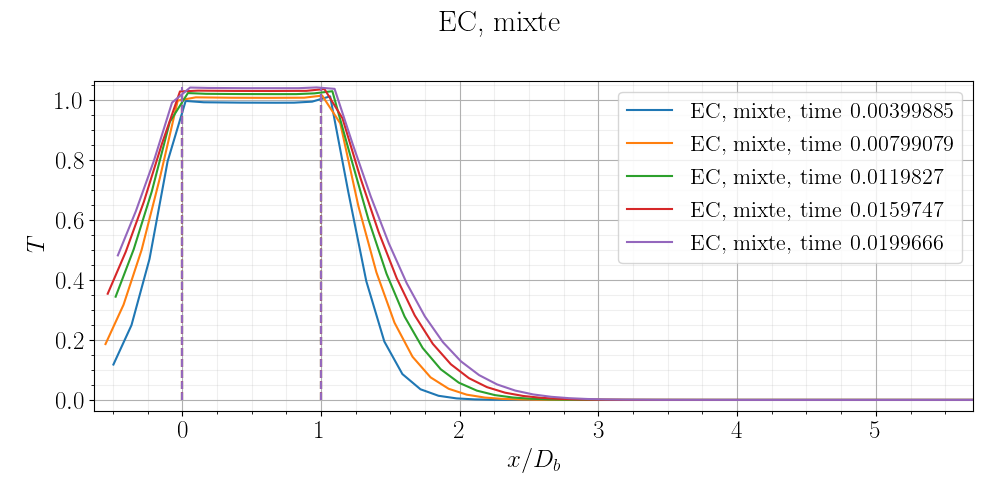

dE*/dt* = 4.59891e-05


0.004169344529003763

In [6]:
num_prop = NumericalProperties(dx=3.9*10**-5, schema='weno', time_scheme='rk4', phy_prop=phy_prop, cfl=0.5)
compare_energy_forme([Problem], phy_prop, num_prop, markers, t_fin)

<IPython.core.display.Javascript object>


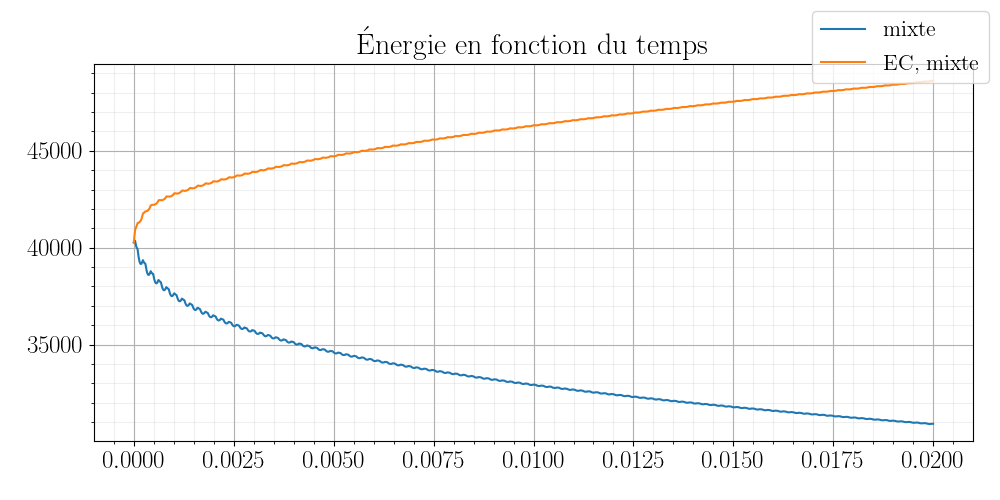


dt fourier
6.918433404737903e-06
mixte


<IPython.core.display.Javascript object>


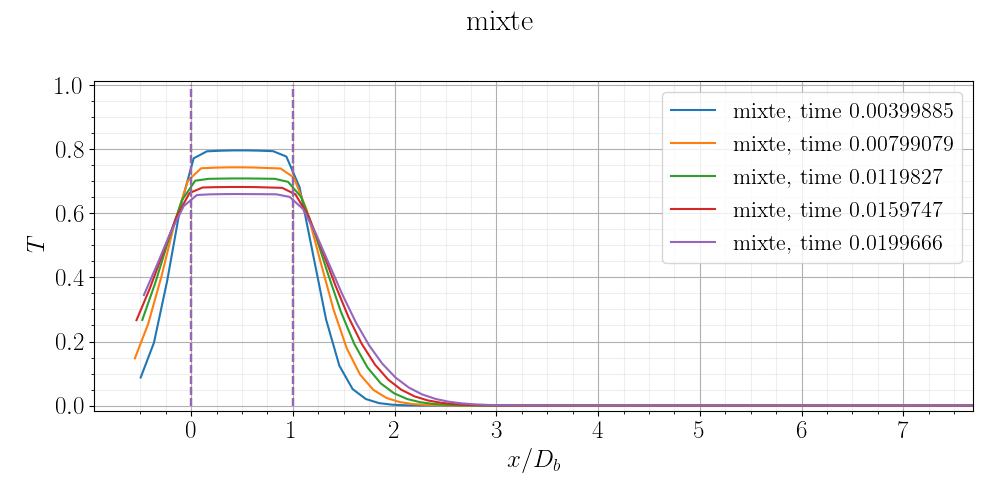

dE*/dt* = -4.52863e-05

dt fourier
6.918433404737903e-06
EC, mixte


<IPython.core.display.Javascript object>


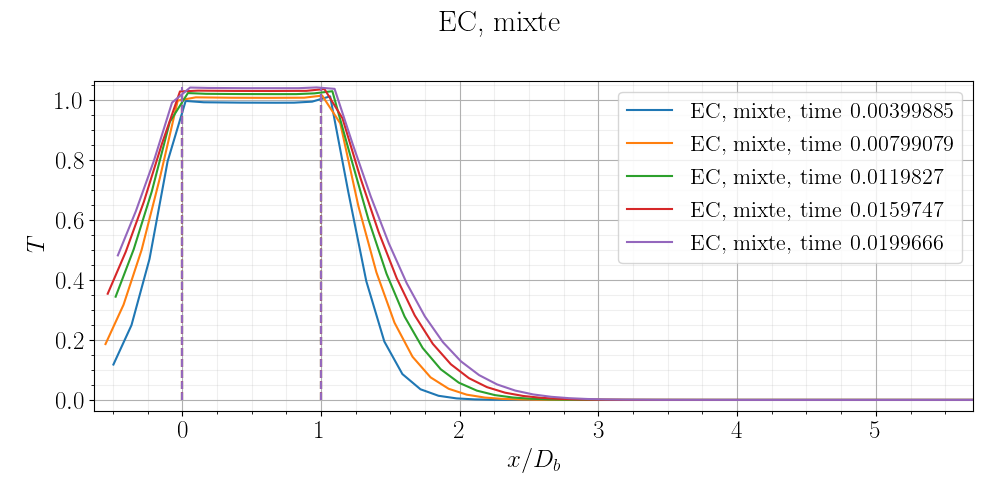

dE*/dt* = 4.59891e-05


0.004169344529003763

In [6]:
num_prop = NumericalProperties(dx=3.9*10**-5, schema='weno', time_scheme='rk4', phy_prop=phy_prop, cfl=0.5)
compare_energy_forme(Formulation, phy_prop, num_prop, markers, t_fin)

### Euler

In [7]:
num_prop = NumericalProperties(dx=3.9*10**-5, schema='weno', time_scheme='euler', phy_prop=phy_prop)

<IPython.core.display.Javascript object>


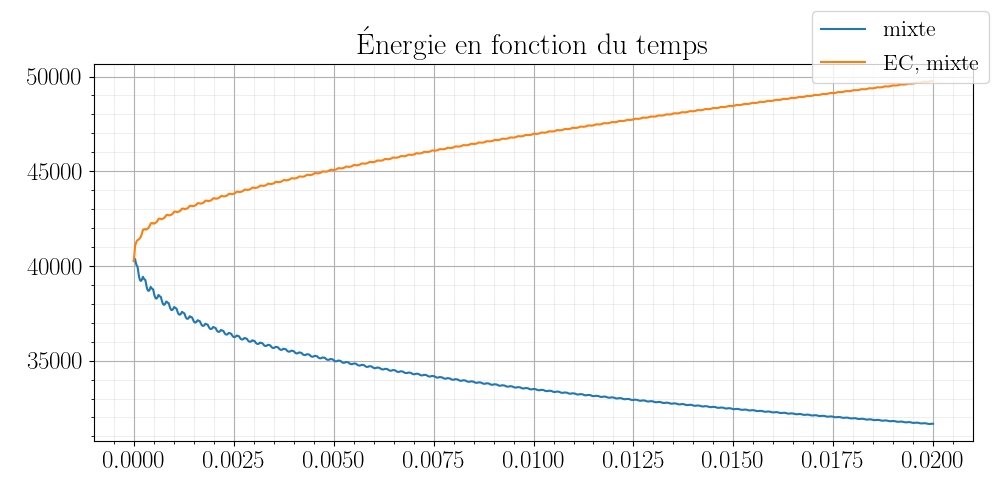


dt fourier
6.918433404737903e-06
mixte


<IPython.core.display.Javascript object>


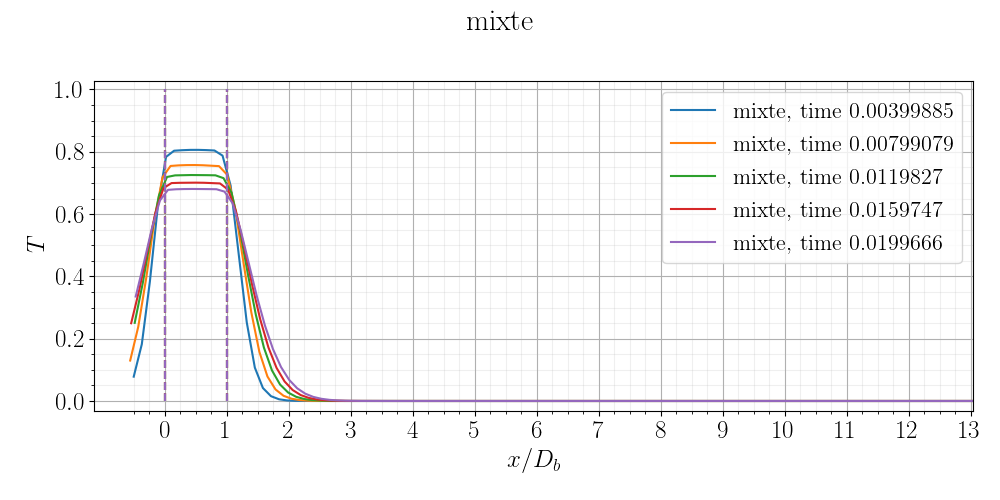

dE*/dt* = -4.12187e-05

dt fourier
6.918433404737903e-06
EC, mixte


<IPython.core.display.Javascript object>


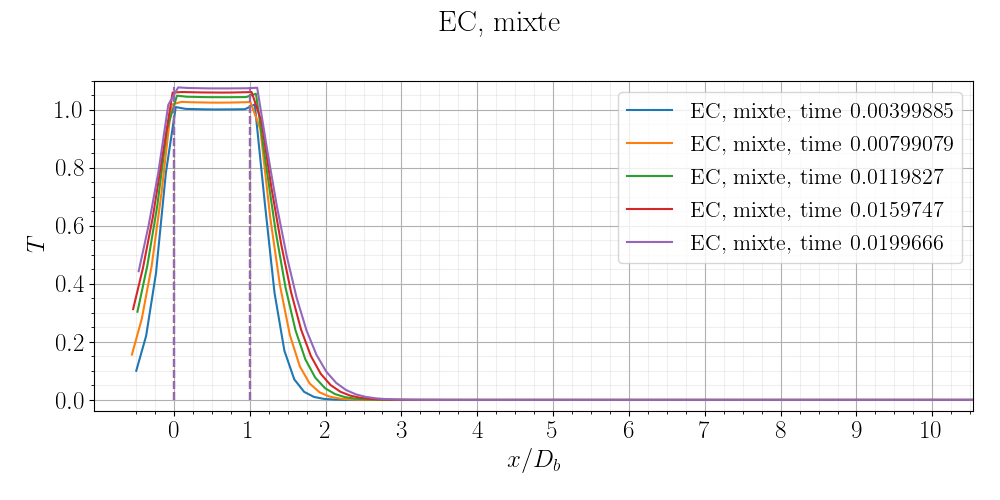

dE*/dt* = 5.5369e-05


0.004751991076580458

In [8]:
compare_energy_forme(Formulation, phy_prop, num_prop, markers, t_fin)

## Cas boniou, euler avec weno et upwind quand le stencil traverse l'interface

<IPython.core.display.Javascript object>


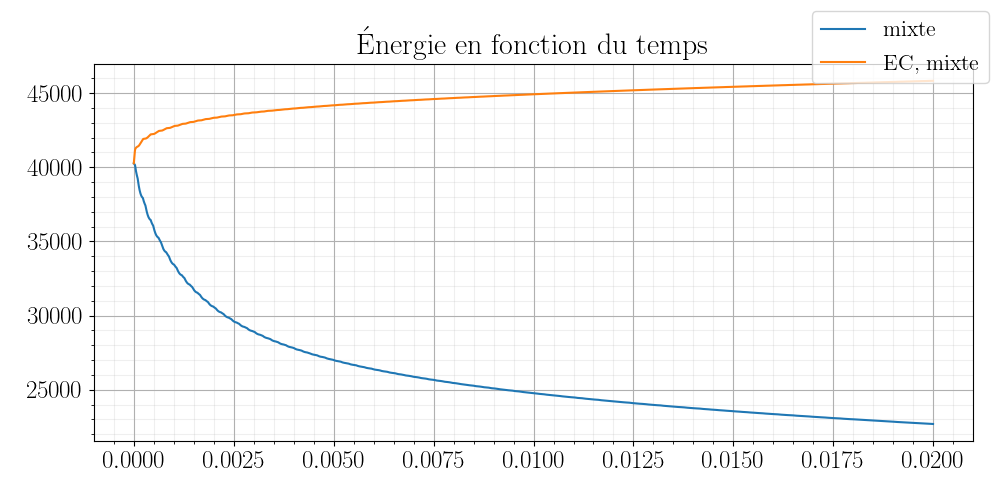


dt fourier
6.918433404737903e-06
mixte


<IPython.core.display.Javascript object>


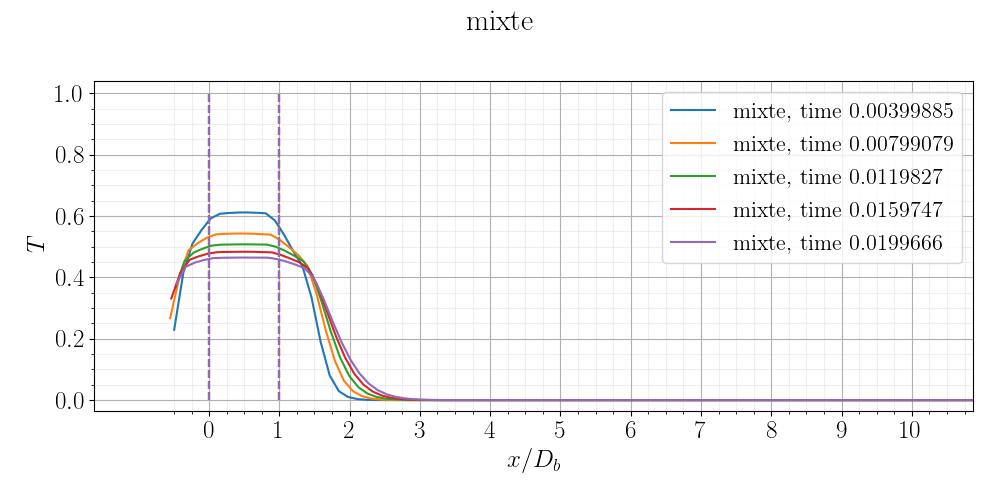

dE*/dt* = -5.50571e-05

dt fourier
6.918433404737903e-06
EC, mixte


<IPython.core.display.Javascript object>


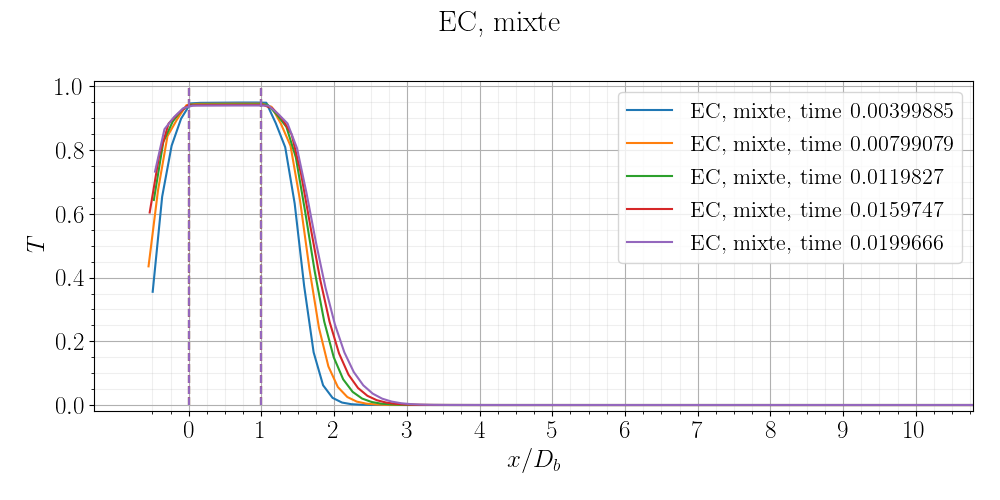

dE*/dt* = 2.00951e-05


0.0027804768261415064

In [9]:
num_prop = NumericalProperties(dx=3.9*10**-5, schema='weno upwind', time_scheme='euler', phy_prop=phy_prop)
compare_energy_forme(Formulation, phy_prop, num_prop, markers, t_fin)

# Étude numérique

## Étude en $\Delta x$

dt fourier
1.8172585062055175e-06


<IPython.core.display.Javascript object>


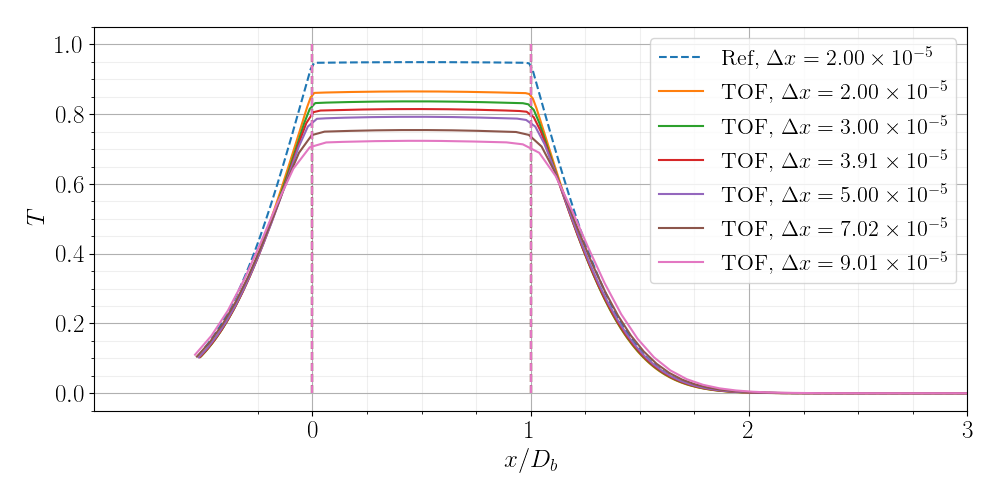

<IPython.core.display.Javascript object>


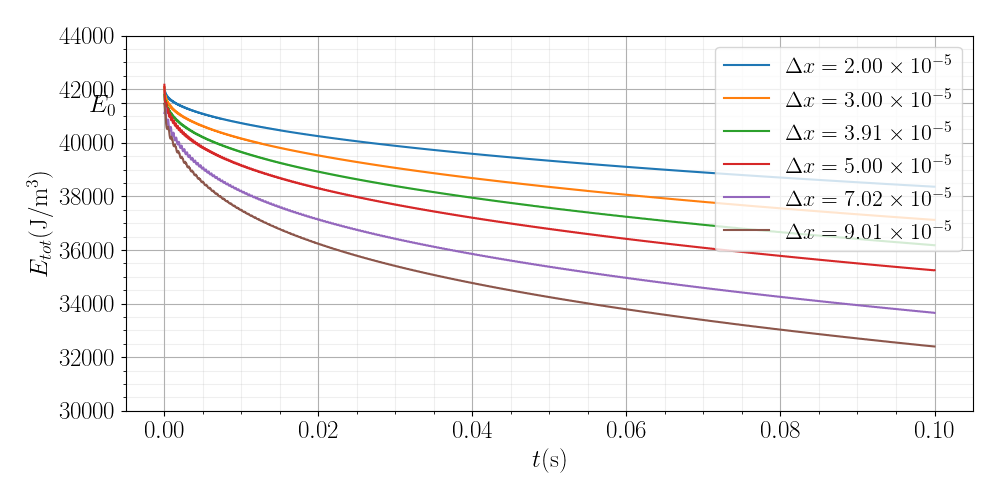

dt min
1.8172585062055175e-06
dt min
1.8172585062055175e-06
dt min
1.8172585062055175e-06
dt min
1.8172585062055175e-06
dt min
1.8172585062055175e-06
dt min
1.8172585062055175e-06


In [21]:
dx_list = [2.*10**-5, 3.*10**-5, 3.9*10**-5, 5.*10**-5, 7.*10**-5, 9.*10**-5]  # 1.*10**-5, 3.*10**-5,  [5*10**-6, 1*10**-5, 3.9*10**-5, 7*10**-5, 10**-4]
t_fin = 0.1
plot = Plotter('decale', time=False, dx=True, zoom=(-1,3))
num_prop_ref = NumericalProperties(dx=min(dx_list), schema='weno', time_scheme='euler', phy_prop=phy_prop)
markers = Bulles(phy_prop=phy_prop, n_bulle=1)
prob_ref = Problem(get_T_creneau, markers=markers, num_prop=num_prop_ref, phy_prop=phy_prop_ref, name='Ref')
prob_ref.timestep(t_fin=t_fin, n=min(n_max, n_lim), number_of_plots=1, debug=None, plotter=plot, ispretty=True, ls='--')
dt_min = prob_ref.dt
fig, ax = plt.subplots(1)
perte_e_dx = []
dx_plot = []

for dx in dx_list:
    num_prop = NumericalProperties(dx=dx, dt=dt_min, schema='weno', time_scheme='euler', phy_prop=phy_prop)
#     perte_e_dx.append(compare_energy_forme(Formulation, phy_prop, num_prop, markers, t_fin))
    prob = Problem(get_T_creneau, markers=markers, num_prop=num_prop, phy_prop=phy_prop)
    t, e = prob.timestep(t_fin=t_fin, n=min(n_max, n_lim), number_of_plots=1, debug=None, plotter=plot, ispretty=False)
    ax.plot(t, e/(0.02*0.005**2), label=r'$\Delta x = \num{%.2e} $' % num_prop.dx)
    perte_e_dx.append(e[0] - e[-1])
    dx_plot.append(num_prop.dx)
    if dx == 3.9*10**-5:
        DE0 = e[0] - e[-1]
ax.minorticks_on()
ax.grid(b=True, which='major')
ax.grid(b=True, which='minor', alpha=0.2)
l = ax.legend(loc='upper right')
fig.canvas.draw()
labels = [item.get_text() for item in ax.get_yticklabels()]
ticks = list(ax.get_yticks())
ticks.append(e[0]/(0.02*0.005**2))
labels.append(r'$E_0$')

ticks = ax.set_yticks(ticks)
ticklab = ax.set_yticklabels(labels)
ax.set_xlabel(r'$t$(s)')
ax.set_ylabel(r'$E_{tot}$(J/m$^3$)')
fig.tight_layout()
if save_fig:
    fig.savefig(savefig_path + 'perte_energie_fonc_t_convgce_dx.pdf')
    plot.fig.savefig(savefig_path + 'temperature_convgce_dx.pdf')

<IPython.core.display.Javascript object>


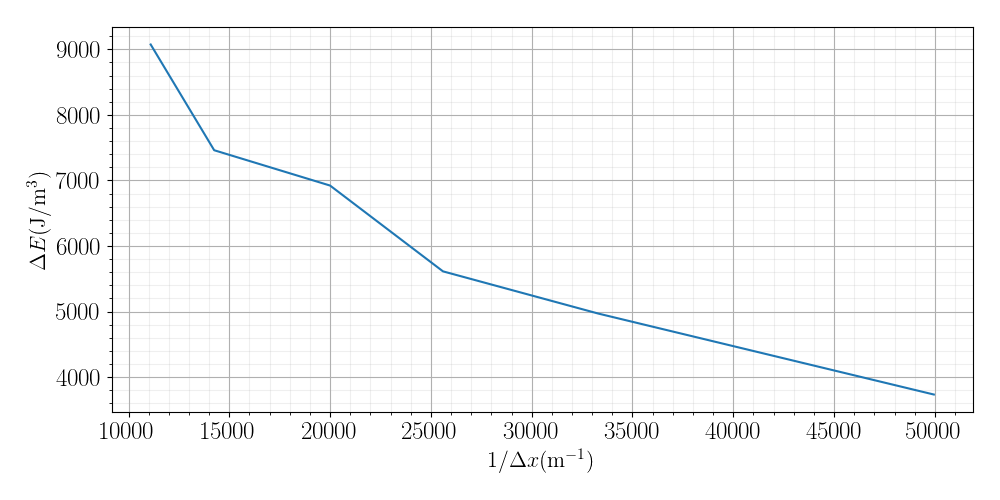

In [22]:
plt.figure()
plt.plot(1./np.array(dx_plot), np.array(perte_e_dx)/(0.02*0.005*0.005))
plt.xlabel(r'$1/\Delta x$(m$^{-1}$)', size=16)
plt.ylabel(r'$\Delta E$(J/m$^3$)', size=16)
plt.grid(b=True, which='major')
plt.minorticks_on()
plt.grid(b=True, which='minor',alpha=0.2)
plt.tight_layout()
if save_fig:
    plt.savefig(savefig_path + 'perte_energie_convgce_dx.pdf')

<IPython.core.display.Javascript object>


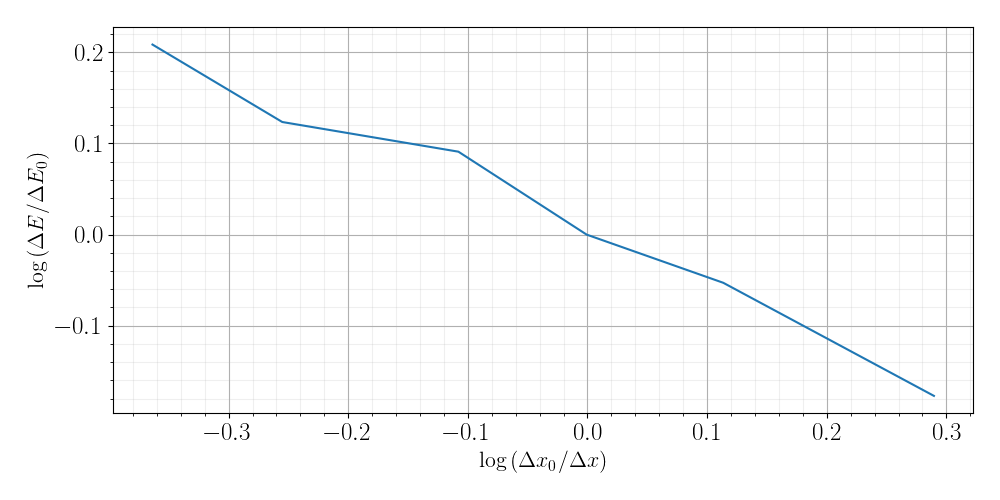

-0.5691186497051216 0.9829478253363204


In [23]:
plt.figure()
x = np.log10(3.9*10**-5/np.array(dx_plot))
y = np.log10(np.array(perte_e_dx)/DE0)
plt.plot(x, y)
plt.xlabel(r'$\log{(\Delta x_0/\Delta x)}$', size=16)
plt.ylabel(r'$\log{(\Delta E/\Delta E_0)}$', size=16)
plt.grid(b=True, which='major')
plt.minorticks_on()
plt.grid(b=True, which='minor', alpha=0.2)
plt.tight_layout()
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(slope, r_value**2)
if save_fig:
    plt.savefig(savefig_path + 'perte_energie_convgce_dx_log.pdf')

In [8]:
E0 = 42000.
dx0 = 3.9*10**-5
dE0 = 6900
dx_lim = dx0 * (5.*E0/(100*dE0))**(1/0.569)
print(dx_lim)
print(0.02/dx_lim)

4.8206281208613194e-06
4148.836935471083


## Étude en $\Delta t$

Ici on ne change pas $\Delta x$, mais on diminue dt_min pour qu'il soit contraignant

dt min
7e-07


<IPython.core.display.Javascript object>


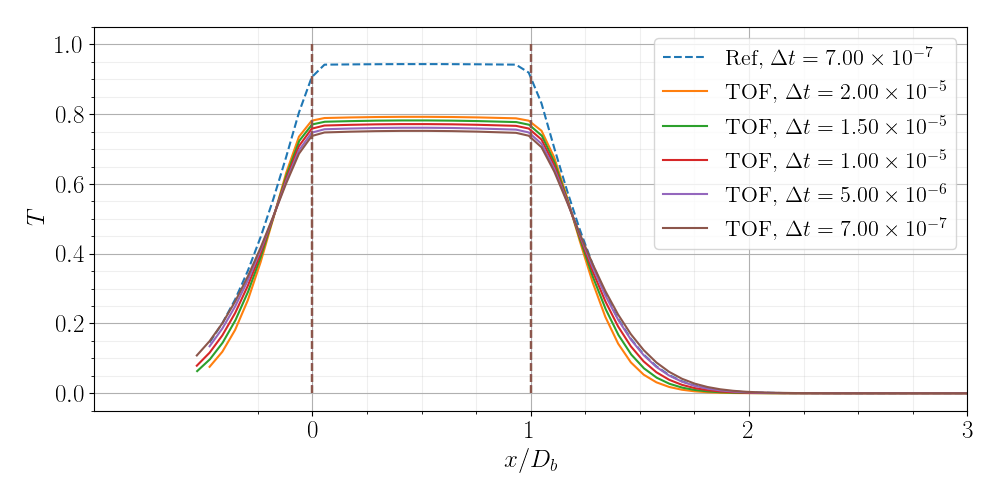

<IPython.core.display.Javascript object>


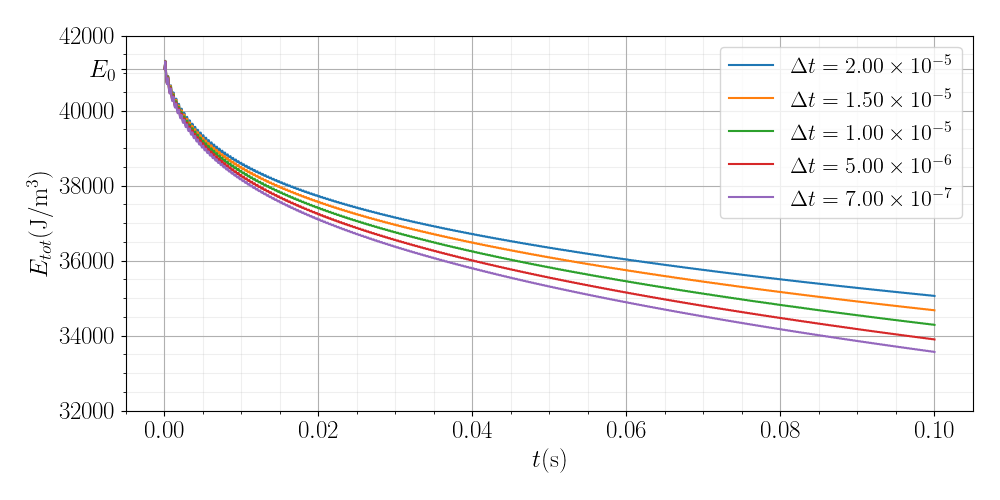

dt min
2e-05
dt min
1.5000000000000002e-05
dt min
1e-05
dt min
4.9999999999999996e-06
dt min
7e-07


In [6]:
dt_min_list = [2*10**-5, 1.5*10**-5, 1*10**-5, 5*10**-6, 7.*10**-7]
t_fin = 0.1
plot = Plotter('decale', time=False, dx=False, dt=True, zoom=(-1,3))
num_prop_ref = NumericalProperties(dx=7.*10**-5, dt=min(dt_min_list), schema='weno', time_scheme='euler', phy_prop=phy_prop)
markers = Bulles(phy_prop=phy_prop, n_bulle=1)
prob_ref = Problem(get_T_creneau, markers=markers, num_prop=num_prop_ref, phy_prop=phy_prop_ref, name='Ref')
prob_ref.timestep(t_fin=t_fin, n=min(n_max, n_lim), number_of_plots=1, debug=None, plotter=plot, ispretty=True, ls='--')
dt_min = prob_ref.dt
fig, ax = plt.subplots(1)
perte_e_dt = []
dt_plot = []

for dt in dt_min_list:
    num_prop = NumericalProperties(dx=7.*10**-5, dt=dt, schema='weno', time_scheme='euler', phy_prop=phy_prop)
    prob = Problem(get_T_creneau, markers=markers, num_prop=num_prop, phy_prop=phy_prop)
    t, e = prob.timestep(t_fin=t_fin, n=min(n_max, n_lim), number_of_plots=1, debug=None, plotter=plot, ispretty=False)
    ax.plot(t, e/(0.02*0.005**2), label=r'$\Delta t = \num{%.2e} $' % prob.dt)
    perte_e_dt.append(e[0] - e[-1])
    dt_plot.append(prob.dt)
    if dt == dt_min:
        DE0 = e[0] - e[-1]
ax.minorticks_on()
ax.grid(b=True, which='major')
ax.grid(b=True, which='minor', alpha=0.2)
l = ax.legend(loc='upper right')
fig.canvas.draw()
labels = [item.get_text() for item in ax.get_yticklabels()]
ticks = list(ax.get_yticks())
ticks.append(e[0]/(0.02*0.005**2))
labels.append(r'$E_0$')

ticks = ax.set_yticks(ticks)
ticklab = ax.set_yticklabels(labels)
ax.set_xlabel(r'$t$(s)')
ax.set_ylabel(r'$E_{tot}$(J/m$^3$)')
fig.tight_layout()
if save_fig:
    fig.savefig(savefig_path + 'perte_energie_fonc_t_convgce_dt.pdf')
    plot.fig.savefig(savefig_path + 'temperature_convgce_dt.pdf')

<IPython.core.display.Javascript object>


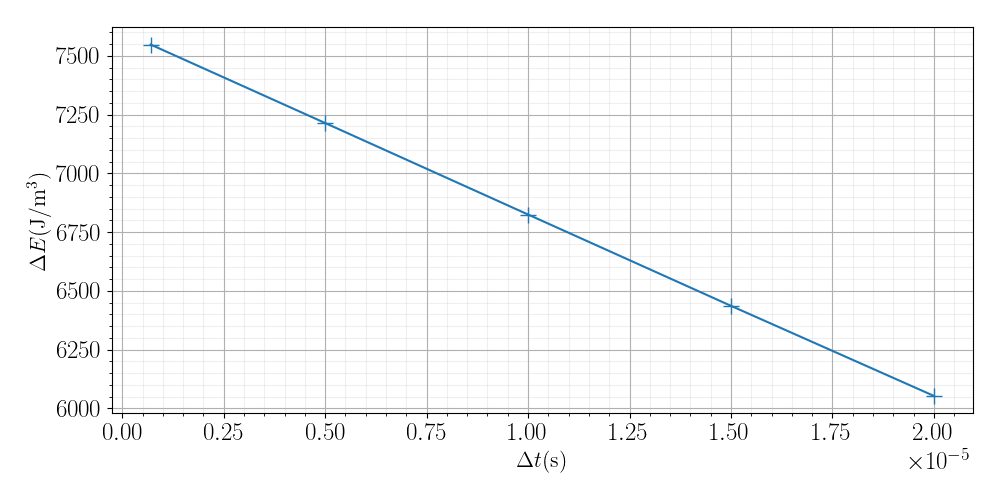

-77496684.33977991 7600.956029638057 0.9999911749991586


In [7]:
plt.figure()
x = np.array(dt_plot)
y = np.array(perte_e_dt)/(0.02*0.005*0.005)
plt.plot(x, y, marker='+', markersize=12)
plt.xlabel(r'$\Delta t$(s)', size=16)
plt.ylabel(r'$\Delta E$(J/m$^3$)', size=16)
plt.grid(b=True, which='major')
plt.minorticks_on()
plt.grid(b=True, which='minor', alpha=0.2)
plt.tight_layout()
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(slope, intercept, r_value**2)
if save_fig:
    plt.savefig(savefig_path + 'perte_energie_convgce_dt.pdf')

<IPython.core.display.Javascript object>


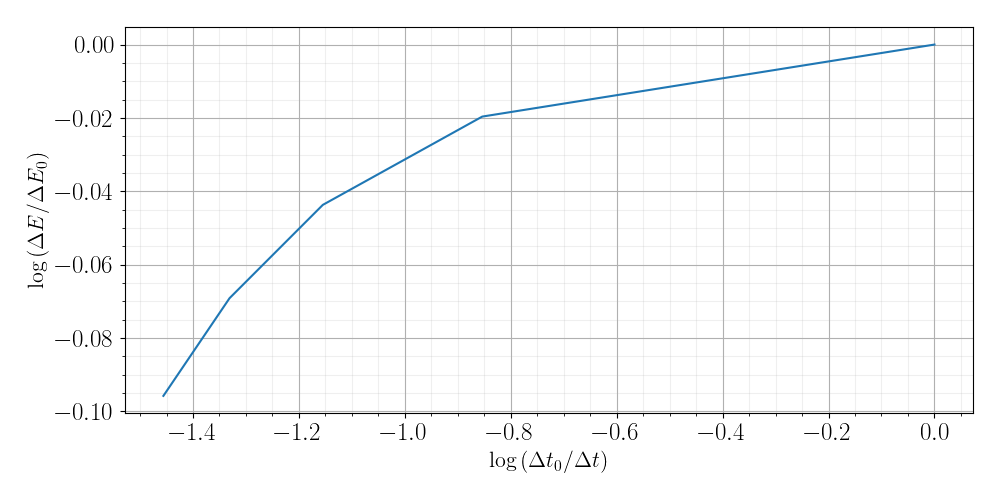

0.05893427284040547 0.8062052421776789


In [11]:
plt.figure()
x = np.log10(dt_plot[-1]/np.array(dt_plot))
y = np.log10(np.array(perte_e_dt)/DE0)
plt.plot(x, y)
plt.xlabel(r'$\log{(\Delta t_0 / \Delta t)}$', size=16)
plt.ylabel(r'$\log{(\Delta E/\Delta E_0)}$', size=16)
plt.grid(b=True, which='major')
plt.minorticks_on()
plt.grid(b=True, which='minor', alpha=0.2)
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(slope, r_value**2)
plt.tight_layout()
if save_fig:
    plt.savefig(savefig_path + 'perte_energie_convgce_dt_log.pdf')

On n'observe pas de différence notable entre les simulations. Cela laisse à penser que seul le maillage spatial permet de diminuer les pertes d'énergie.

Essayons d'analyser les sources de perte d'énergie.


# Étude qualitative

## Pertes en diffusion pure

In [ ]:
t_fin = 0.02
phy_prop = PhysicalProperties(Delta=0.02, v=0., dS=0.005**2,
                              lda1=5.5*10**-2, lda2=15.5, rho_cp1=70278., rho_cp2=702780., diff=1.,
                              alpha=0.06, a_i=357.)
num_prop = NumericalProperties(dx=7*10**-5, schema='weno upwind', time_scheme='euler', phy_prop=phy_prop)
compare_energy_forme(Formulation, phy_prop, num_prop, markers, t_fin)

## Perte d'énergie en convection pure

In [ ]:
t_fin = 0.02
phy_prop = PhysicalProperties(Delta=0.02, v=0.2, dS=0.005**2,
                              lda1=5.5*10**-2, lda2=15.5, rho_cp1=70278., rho_cp2=702780., diff=0.,
                              alpha=0.06, a_i=357.)
num_prop = NumericalProperties(dx=7*10**-5, schema='weno upwind', time_scheme='euler', phy_prop=phy_prop)
compare_energy_forme(Formulation, phy_prop, num_prop, markers, t_fin)

## Étude selon les schémas numériques

In [ ]:
Schemas = ['upwind', 'center', 'weno', 'weno upwind']
Time_scheme = ['euler', 'rk4']
def compare_energy_schema(schemas, form, time_scheme, phy_prop, markers, t_fin):
    fig1,ax1 = plt.subplots(1)
    ax1.set_title('Énergie en fonction du temps')
    for schem in schemas:
        for ts in time_scheme:
            a = Plotter('decale')
            num_prop = NumericalProperties(dx=4*10**-5, schema=schem, time_scheme=ts, phy_prop=phy_prop)
            print()
            prob = form(get_T_creneau, markers, phy_prop=phy_prop, num_prop=num_prop)
            E0 = prob.energy
            print(prob.name)
            print('==========================')
            t, e = prob.timestep(t_fin=t_fin, n=min(n_lim, n_max), number_of_plots=5, debug=None, plotter=a)
            a.ax.set_xlim(0., phy_prop.Delta/2)
            a.ax.set_ylim(0.6, 1.1)
            l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob.name)
            n = len(e)
            i0 = int(n/5)
            dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob.dt / E0  # on a mult
            # par Dt / rho_cp_l T_l V
            print('dE*/dt* = %f' % dedt_adim)
    le = fig1.legend()
    ax1.grid(b=True, which='major')
    ax1.minorticks_on()
    ax1.grid(b=True, which='minor', alpha=0.2)

In [ ]:
t_fin = 0.02
fig1, ax1 = plt.subplots(1)
a = Plotter('decale')
num_prop = NumericalProperties(dx=4*10**-5, schema='weno', time_scheme='rk4', phy_prop=phy_prop)
print()
prob_ref = Problem(get_T_creneau, markers, phy_prop=phy_prop, num_prop=num_prop)
E0 = prob_ref.energy
print(prob_ref.name)
print('==========================')
t, e = prob_ref.timestep(t_fin=t_fin, n=min(n_lim, n_max), number_of_plots=2, debug=None, plotter=a)
l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob_ref.name)
n = len(e)
i0 = int(n/5)
dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob_ref.dt / E0  # on a mult

num_prop = NumericalProperties(dx=5*10**-6, schema='weno', time_scheme='rk4', phy_prop=phy_prop)
print()
prob_ref = Problem(get_T_creneau, markers, phy_prop=phy_prop, num_prop=num_prop)
E0 = prob_ref.energy
print(prob_ref.name)
print('==========================')
t, e = prob_ref.timestep(t_fin=t_fin, n=min(n_lim, n_max), number_of_plots=2, debug=None, plotter=a)
a.ax.set_ylim(0.5,1.05)
a.ax.set_xlim(0., phy_prop.Delta/4.)
l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob_ref.name)
ax1.legend()
ax1.grid(b=True, which='major')
ax1.minorticks_on()
ax1.grid(b=True, which='minor', alpha=0.2)
n = len(e)
i0 = int(n/5)
dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob_ref.dt / E0  # on a mult
# par Dt / rho_cp_l T_l V
print('dE*/dt* = %f' % dedt_adim)

In [ ]:
t_fin = 0.02
Schemas = ['upwind', 'weno', 'weno upwind']
compare_energy_schema(Schemas, Problem, Time_scheme, phy_prop, markers, t_fin)

In [ ]:
Schemas = ['upwind', 'weno', 'weno upwind']
Time_scheme = ['euler', 'rk4']
compare_energy_schema(Schemas, ProblemConserv2, Time_scheme, phy_prop, markers, t_fin)

# Profiling du code

In [ ]:
from line_profiler import LineProfiler
num_prop = NumericalProperties(dx=7*10**-5, schema='weno upwind', time_scheme='rk4', phy_prop=phy_prop, dt=1.)
lp = LineProfiler()
func = [Problem._rk4_timestep, Bulles.indicatrice_liquide, Problem._compute_convection_flux, Problem._compute_diffusion_flux]
for fu in func:
    lp.add_function(fu)   # add additional function to profile
lp_wrapper = lp(compare_energy_forme)
lp_wrapper(Formulation, phy_prop, num_prop, markers, 0.1)
lp.print_stats()

# Comparaison des meilleurs cas pour chaque formulation

In [ ]:
t_fin = 0.2
fig1, ax1 = plt.subplots(1)

for dx in [2*10**-5, 4*10**-5, 7*10**-5, 10*10**-5]:
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~')
    a = Plotter('decale')
    num_prop = NumericalProperties(dx=dx, schema='weno', time_scheme='rk4', phy_prop=phy_prop)
    print()
    prob_ref = Problem(get_T_creneau, markers, phy_prop=phy_prop, num_prop=num_prop)
    E0 = prob_ref.energy_m
    print(prob_ref.name)
    print('==========================')
    t, e = prob_ref.timestep(t_fin=t_fin, n=min(n_lim, n_max), number_of_plots=2, debug=None, plotter=a)
    l = ax1.plot(t, e, label=prob_ref.name)
    n = len(e)
    i0 = int(n/5)
    dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob_ref.dt / E0  # on a mult
    print('dE/dt = %g' % dedt_adim)

    num_prop = NumericalProperties(dx=dx, schema='weno upwind', time_scheme='rk4', phy_prop=phy_prop)
    print()
    prob_ref = ProblemConserv2(get_T_creneau, markers, phy_prop=phy_prop, num_prop=num_prop)
    E0 = prob_ref.energy_m
    print(prob_ref.name)
    print('==========================')
    t, e = prob_ref.timestep(t_fin=t_fin, n=min(n_lim, n_max), number_of_plots=2, debug=None, plotter=a)
    l = ax1.plot(t, e, label=prob_ref.name)
    n = len(e)
    i0 = int(n/5)
    dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob_ref.dt 
    print('dE/dt = %g' % dedt_adim)
    
    a.ax.set_ylim(0.,1.05)
    a.ax.set_xlim(0., phy_prop.Delta/4.)
    ax1.legend()
    ax1.grid(b=True)

In [ ]:
markers.shift(10**-6/7.)

In [ ]:
# %matplotlib inline
# rc('figure', figsize=(10,7))
# rc('figure', dpi=100)
n_ = 10**5
t_fin = 10**-6
fig1, ax1 = plt.subplots(1)

for dx in [5*10**-6]:  # , 4*10**-6, 3*10**-6, 2*10**-6, 1*10**-6]:
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~')
    a = Plotter('decale')
    num_prop = NumericalProperties(dx=dx, schema='weno', time_scheme='rk4', phy_prop=phy_prop)
    print()
    prob_ref = Problem(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop)
    E0 = prob_ref.energy
    print(prob_ref.name)
    print('==========================')
    t, e = prob_ref.timestep(n=min(n, n_max), t_fin=t_fin, number_of_plots=1, plotter=a)
    l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob_ref.name)
    n = len(e)
    i0 = int(n/5)
    dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob_ref.dt / E0  # on a mult
    print('dE/dt = %g' % dedt_adim)

    num_prop = NumericalProperties(dx=dx, schema='weno upwind', time_scheme='rk4', phy_prop=phy_prop)
    print()
    prob_ref = ProblemConserv2(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop)
    E0 = prob_ref.energy
    print(prob_ref.name)
    print('==========================')
    t, e = prob_ref.timestep(t_fin=t_fin, n=min(n_, n_max), number_of_plots=1, plotter=a)
    l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob_ref.name)
    n = len(e)
    i0 = int(n/5)
    dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob_ref.dt
    print('dE/dt = %g' % dedt_adim)
    
    a.ax.set_ylim(0.94,1.02)
    a.ax.set_xlim(prob_ref.bulles.markers[0][0] - prob_ref.bulles.diam / 4., prob_ref.bulles.markers[0][0] + prob_ref.bulles.diam / 2.,)
    ax1.legend()
#     ax1.grid(b=True, which='both')

if save_fig:
    a.fig.savefig(savefig_path + 'comparaison_energie_temperature.pdf')